Thank you for agreeing to participate in UDST's second pilot workshop. You'll be working in this notebook tomorrow, it loads in the data for you and provides a useful function. Have fun!

In [1]:
#load in necessary libraries

%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import os

In [2]:
#load in particular modules (we'll likely load in more during the workshop)
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model

In [3]:
#load the data
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Speed Dating Data.csv')

#read the data
df = pd.read_csv(file_path, encoding='cp1252')
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [4]:
#splitting the data by gender
female_df = df.loc[df['gender'] == 0]
male_df = df.loc[df['gender'] == 1]

(4184, 195)
(4194, 195)


In [5]:
#YOUR INPUT HERE, PUT IN THE FEATURES YOU'RE INTERESTED IN INVESTIGATING
features = []

In [6]:
female_decision_df=female_df.filter(features, axis=1)
female_decision_df.isnull().sum()

#for simplicity, we will remove all the rows with null entries
clean_female_decision_df = female_decision_df.dropna(axis=0, how='any')
clean_female_decision_df.shape

(3415, 8)

In [7]:
male_decision_df=male_df.filter(features, axis=1)
male_decision_df.isnull().sum()

#for simplicity, we will remove all the rows with null entries
clean_male_decision_df = male_decision_df.dropna(axis=0, how='any')
clean_male_decision_df.shape

(3555, 8)

In [16]:
yes_female = clean_female_decision_df.query('dec == 1')
no_female = clean_female_decision_df.query('dec == 0')
print('Proportion of acceptance by female is {}'.format(float(yes_female.shape[0])/clean_female_decision_df.shape[0]))

Proportion of acceptance by female is 0.372181551977


In [18]:
yes_male = clean_male_decision_df.query('dec == 1')
no_male = clean_male_decision_df.query('dec == 0')
print('Proportion of acceptance by male is {}'.format(float(yes_male.shape[0])/clean_male_decision_df.shape[0]))

Proportion of acceptance by male is 0.488326300985


In [11]:
#useful function
def plot_feature(feature):
    ax = plt.subplot(211)
    ax.set_title('female')
    x = [no_female[feature].values]
    y = [yes_female[feature].values]
    plt.hist([x, y], label=['no','yes'])
    ax.legend()
    
    ax = plt.subplot(212)
    ax.set_title('male')
    x = [no_male[feature].values]
    y = [yes_male[feature].values]
    plt.hist([x, y], label=['no','yes'])
    ax.legend()
    plt.show()

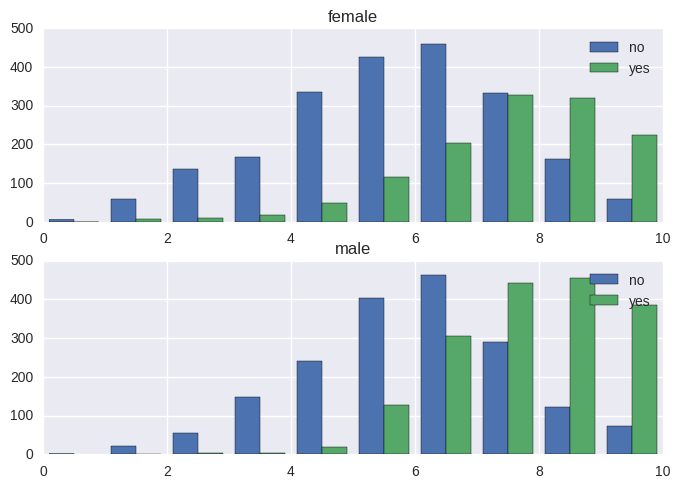

In [13]:
#enter the feature you'd like to plot
plot_feature()